In [1]:
import fastai
import torch
import cv2
from fastai.vision.all import *
from ipywidgets import widgets

In [2]:
train = '/kaggle/input/pnevmoniya/train'

In [3]:
def is_ill(x):
    return x[0].islower()

In [4]:
dls = ImageDataLoaders.from_name_func(
    train, get_image_files(train), valid=0.2, seed=33,
    label_func=is_ill, item_tfms=Resize(256)
)

In [5]:
learn = cnn_learner(dls, resnet101, metrics=accuracy)
learn.fine_tune(2)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.369093,0.161141,0.959732,02:16


epoch,train_loss,valid_loss,accuracy,time
0,0.118445,0.165478,0.968360,02:16
1,0.064928,0.065243,0.987536,02:17


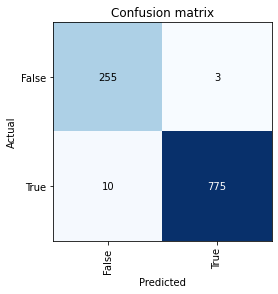

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:
sample = pd.read_csv('/kaggle/input/pnevmoniya/sample_solution.csv')
sample

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [8]:
for i in range(0,624):
    label = sample.iloc[i,0]
    img = cv2.imread('/kaggle/input/pnevmoniya/test/'+label)
    pred, pred_id, probs = learn.predict(img)
    sample.iloc[i,1] = pred

In [9]:
map = {'PNEUMONIA': 1, 'NORMAL': 0}
sample = sample.replace({'labels': map})

In [10]:
sample.to_csv('submission(POP).csv', index=False)